#Podłączenie dysku

In [3]:
!pip install -U --no-cache-dir gdown --pre

!rm -rf data && mkdir data

!gdown 13iHzmUjtRw-szibWFJfuMhivB8GqbsVF -O data.zip

!unzip -q data.zip -d data

Downloading...
From (original): https://drive.google.com/uc?id=13iHzmUjtRw-szibWFJfuMhivB8GqbsVF
From (redirected): https://drive.google.com/uc?id=13iHzmUjtRw-szibWFJfuMhivB8GqbsVF&confirm=t&uuid=9340c49b-1d3d-45e4-acf1-ed816367599a
To: /content/data.zip
100% 60.2M/60.2M [00:01<00:00, 54.8MB/s]


In [4]:
!ls data

apple  avocado	banana	kiwi  mandarin	orange	pear  pepper  potato  tomato


#Import

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
import glob
import os

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

#Trenowanie

In [6]:
batch_size = 32
class_count = 10

img_height = 64
img_width = 64

print(os.getcwd())

train_ds = tf.keras.utils.image_dataset_from_directory(
  'data',
  subset = "training",
  validation_split = 0.2,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

val_ds = tf.keras.utils.image_dataset_from_directory(
  'data',
  subset = 'validation',
  validation_split = 0.5,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

#Wyświetlenie klas
class_names = train_ds.class_names
print(f'class names: {class_names}')

#Drobna optymalizacja
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=tf.data.AUTOTUNE)

#Tworzenie struktury modelu
model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(class_count)
])

#Kompilowanie modelu oraz wyświetlanie jego struktury
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
#model.summary()

/content
Found 6267 files belonging to 10 classes.
Using 5014 files for training.
Found 6267 files belonging to 10 classes.
Using 3133 files for validation.
class names: ['apple', 'avocado', 'banana', 'kiwi', 'mandarin', 'orange', 'pear', 'pepper', 'potato', 'tomato']


##Uruchomienie procesu trenowania

In [7]:
epochs=15

history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/15
157/157 [==============================] - 10s 25ms/step - loss: 0.5450 - accuracy: 0.8117 - val_loss: 0.1382 - val_accuracy: 0.9566
Epoch 2/15
157/157 [==============================] - 1s 6ms/step - loss: 0.0620 - accuracy: 0.9828 - val_loss: 0.0843 - val_accuracy: 0.9658
Epoch 3/15
157/157 [==============================] - 1s 6ms/step - loss: 0.0280 - accuracy: 0.9918 - val_loss: 0.0128 - val_accuracy: 0.9952
Epoch 4/15
157/157 [==============================] - 1s 6ms/step - loss: 0.0084 - accuracy: 0.9976 - val_loss: 0.0104 - val_accuracy: 0.9974
Epoch 5/15
157/157 [==============================] - 1s 6ms/step - loss: 0.0367 - accuracy: 0.9878 - val_loss: 0.0291 - val_accuracy: 0.9898
Epoch 6/15
157/157 [==============================] - 1s 6ms/step - loss: 0.0092 - accuracy: 0.9968 - val_loss: 0.0225 - val_accuracy: 0.9923
Epoch 7/15
157/157 [==============================] - 1s 6ms/step - loss: 0.0136 - accuracy: 0.9970 - val_loss: 0.0717 - val_accuracy: 0.9732
Epoc

##Ocena wytrenowanego modelu

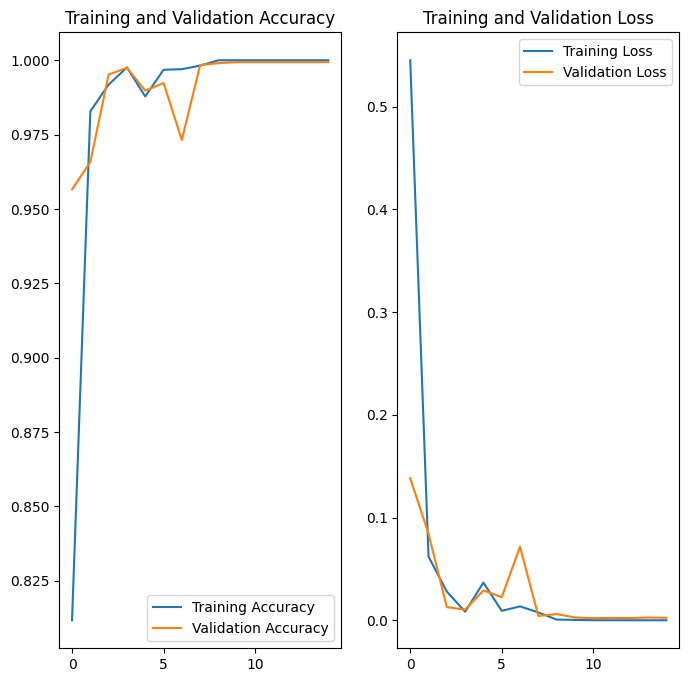

In [8]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [9]:
from sklearn.metrics import classification_report

def evaluate_model(val_ds,model):
    y_pred = []
    y_true = []

    for batch_images, batch_labels in val_ds:
        predictions = model.predict(batch_images,verbose = 0)
        y_pred = y_pred + np.argmax(tf.nn.softmax(predictions), axis = 1).tolist()
        y_true = y_true + batch_labels.numpy().tolist()
    print(classification_report(y_true,y_pred))

evaluate_model(val_ds,model)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       998
           1       1.00      1.00      1.00       165
           2       1.00      1.00      1.00       645
           3       1.00      1.00      1.00        80
           4       1.00      1.00      1.00        77
           5       1.00      1.00      1.00        89
           6       1.00      1.00      1.00       220
           7       1.00      1.00      1.00       314
           8       1.00      1.00      1.00       146
           9       1.00      1.00      1.00       399

    accuracy                           1.00      3133
   macro avg       1.00      1.00      1.00      3133
weighted avg       1.00      1.00      1.00      3133

